# Enhancing Cyberattack Detection in IoT Environments Through Advanced Resampling Techniques
Carlos A. C. Tojeiro, Thiago J. Lucas, Leandro A. Passos,

Douglas Rodrigues, Simone G. D. Prado, Joao Paulo Papa, Kelton A. P. da Costa  ̃
Department of Computing, Sao Paulo State University  ̃ , Bauru, Brazil

{carlos.tojeiro, t.lucas, leandro.passos, d.rodrigues, simone.prado, joao.papa, kelton.costa}@unesp.br


In [1]:
#Importando das Bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Importando os dados
df = pd.read_csv('/home/carlos/arquivo2.csv',sep = ';')

In [3]:
MeusDados = df

In [4]:
# Verificando os dados

In [5]:
#Estátisticas dos dados
MeusDados.describe()

pkSeqID         sport         dport           pkts         bytes  \
count  1.443700e+04  14258.000000  14258.000000   14437.000000  1.443700e+04   
mean   1.396678e+06  45364.936737  14386.097279     523.823578  6.016335e+05   
std    3.706150e+05   9611.232314  20140.145242    7605.496829  1.280922e+07   
min    1.000001e+06      0.000000      0.000000       1.000000  6.000000e+01   
25%    1.003610e+06  41607.000000     53.000000       2.000000  1.200000e+02   
50%    1.501637e+06  45811.500000   2348.500000       2.000000  1.340000e+02   
75%    1.828377e+06  51377.500000  27504.250000       2.000000  2.270000e+02   
max    1.859866e+06  65449.000000  65517.000000  322677.000000  8.191219e+08   

                 seq           dur          mean        stddev           sum  \
count   14437.000000  1.443700e+04  1.443700e+04  1.443700e+04  1.443700e+04   
mean    85797.191799  3.498836e+07  2.089401e+05  8.122950e+04  1.394170e+07   
std     86601.641568  2.615686e+08  6.712769e+05  3.145399e+05  1.707288e+08   
min         1.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%      1066.000000  4.578400e+04  1.530000e+02  0.000000e+00  1.670000e+02   
50%     36092.000000  5.855100e+04  4.494900e+04  0.000000e+00  4.532300e+04   
75%    182962.000000  5.045142e+06  5.873800e+04  0.000000e+00  5.973100e+04   
max    326724.000000  3.536090e+09  4.987854e+06  2.480851e+06  3.502990e+09   

                min           max          spkts          dpkts        sbytes  \
count  1.443700e+04  1.443700e+04   14437.000000   14437.000000  1.443700e+04   
mean   1.130299e+05  3.019728e+05     377.626446     146.197132  3.600994e+05   
std    4.751006e+05  8.935848e+05    5391.915663    3168.223804  7.095653e+06   
min    0.000000e+00  0.000000e+00       1.000000       0.000000  4.200000e+01   
25%    0.000000e+00  1.640000e+02       1.000000       1.000000  6.000000e+01   
50%    3.534300e+04  4.532200e+04       1.000000       1.000000  7.400000e+01   
75%    5.319600e+04  5.955600e+04       2.000000       1.000000  1.760000e+02   
max    4.953515e+06  4.999999e+06  234653.000000  161338.000000  4.747344e+08   

             dbytes         srate         drate        attack  
count  1.443700e+04  1.443700e+04  1.443700e+04  14437.000000  
mean   2.415341e+05  2.274852e+07  1.852606e+07      0.657754  
std    9.791885e+06  3.582645e+08  3.152319e+08      0.474478  
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  
25%    6.000000e+01  0.000000e+00  0.000000e+00      0.000000  
50%    6.000000e+01  0.000000e+00  0.000000e+00      1.000000  
75%    1.510000e+02  1.981040e+05  0.000000e+00      1.000000  
max    8.181230e+08  1.376147e+10  1.376147e+10      1.000000

In [6]:
#verificando o número de linhas do dataframe e os tipos dos dados.
MeusDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14437 entries, 0 to 14436
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pkSeqID  14437 non-null  int64  
 1   stime    14437 non-null  object 
 2   flgs     14437 non-null  object 
 3   proto    14437 non-null  object 
 4   saddr    14371 non-null  object 
 5   sport    14258 non-null  float64
 6   daddr    14371 non-null  object 
 7   dport    14258 non-null  float64
 8   pkts     14437 non-null  int64  
 9   bytes    14437 non-null  int64  
 10  state    14437 non-null  object 
 11  ltime    14437 non-null  object 
 12  seq      14437 non-null  int64  
 13  dur      14437 non-null  int64  
 14  mean     14437 non-null  int64  
 15  stddev   14437 non-null  int64  
 16  sum      14437 non-null  int64  
 17  min      14437 non-null  int64  
 18  max      14437 non-null  int64  
 19  spkts    14437 non-null  int64  
 20  dpkts    14437 non-null  int64  
 21  sbytes   144

In [7]:
#Selecionar somente colunas do tipo objeto
MeusDados.select_dtypes(include='object')

stime flgs proto        saddr       daddr state        ltime  \
0      1,52695E+15    e   tcp  1,92168E+11  1921681003   RST  1,52695E+15   
1      1,52695E+15    e   tcp  1,92168E+11  1921681003   RST  1,52695E+15   
2      1,52695E+15    e   tcp  1,92168E+11  1921681003   RST  1,52695E+15   
3      1,52695E+15    e   tcp  1,92168E+11  1921681003   RST  1,52695E+15   
4      1,52695E+15    e   tcp  1,92168E+11  1921681003   RST  1,52695E+15   
...            ...  ...   ...          ...         ...   ...          ...   
14432  1,52808E+15    e   tcp   1921681006  1921681003   CON  1,52808E+15   
14433  1,52808E+15    e   tcp  19216810046  1921681005   CON  1,52808E+15   
14434  1,52808E+15    e   tcp   1921681005  1921681003   CON  1,52808E+15   
14435  1,52808E+15    e   udp   1921681007  1921681003   INT  1,52808E+15   
14436  1,52808E+15    e   tcp   1921681003  5264239193   CON  1,52808E+15   

           rate  
0      23862932  
1      23868057  
2      23868057  
3      23860085  
4      23868628  
...         ...  
14432  26975792  
14433   7993795  
14434  47964863  
14435  42969894  
14436    845206  

[14437 rows x 8 columns]

In [8]:
#Checando valores missing 
MeusDados.isnull().sum()

pkSeqID      0
stime        0
flgs         0
proto        0
saddr       66
sport      179
daddr       66
dport      179
pkts         0
bytes        0
state        0
ltime        0
seq          0
dur          0
mean         0
stddev       0
sum          0
min          0
max          0
spkts        0
dpkts        0
sbytes       0
dbytes       0
rate         0
srate        0
drate        0
attack       0
dtype: int64

In [9]:
#Quantidade de linhas e colunas do Dataframe
df.shape

(14437, 27)

# Preparando os dados

In [11]:
#Transformando colunas categóricas em numéricas
df = pd.get_dummies(df)
df.head().T

0          1          2          3          4
pkSeqID        1000001.0  1000002.0  1000003.0  1000004.0  1000005.0
sport            49731.0    49731.0    49731.0    49731.0    49731.0
dport            41081.0    13371.0     3796.0    63993.0    27356.0
pkts                 2.0        2.0        2.0        2.0        2.0
bytes              120.0      120.0      120.0      120.0      120.0
...                  ...        ...        ...        ...        ...
rate_999357          0.0        0.0        0.0        0.0        0.0
rate_999403          0.0        0.0        0.0        0.0        0.0
rate_999456          0.0        0.0        0.0        0.0        0.0
rate_99950027        0.0        0.0        0.0        0.0        0.0
rate_999507          0.0        0.0        0.0        0.0        0.0

[8068 rows x 5 columns]

In [12]:
#Importação de outras bibliotecas importantes para nosso projeto
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [14]:
#Verificando novamente o número de linhas do nosso dataframe e quais os tipos dos dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14437 entries, 0 to 14436
Columns: 8068 entries, pkSeqID to rate_999507
dtypes: float64(2), int64(17), uint8(8049)
memory usage: 112.9 MB


In [15]:
# Importando módulos necessários:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [19]:
#Quantidade de linhas e colunas do DataFrame
df.shape

(14437, 8068)

In [20]:
#Importando outras bibliotecas importantes para nosso projeto
from matplotlib import pyplot as plt
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [21]:
#mostra linha 1,2,3  da coluna attack
df.loc[[1,2,3],['attack']]

attack
1       1
2       1
3       1

In [23]:
#Removendo missing values
df.dropna(inplace = True)
df.head()

pkSeqID    sport    dport  pkts  bytes     seq    dur   mean  stddev  \
0  1000001  49731.0  41081.0     2    120  180408  41906  41906       0   
1  1000002  49731.0  13371.0     2    120  180409  41897  41897       0   
2  1000003  49731.0   3796.0     2    120  180410  41897  41897       0   
3  1000004  49731.0  63993.0     2    120  180411  41911  41911       0   
4  1000005  49731.0  27356.0     2    120  180412  41896  41896       0   

     sum  ...  rate_999079  rate_999122  rate_999196  rate_999247  \
0  41906  ...            0            0            0            0   
1  41897  ...            0            0            0            0   
2  41897  ...            0            0            0            0   
3  41911  ...            0            0            0            0   
4  41896  ...            0            0            0            0   

   rate_999295  rate_999357  rate_999403  rate_999456  rate_99950027  \
0            0            0            0            0              0   
1            0            0            0            0              0   
2            0            0            0            0              0   
3            0            0            0            0              0   
4            0            0            0            0              0   

   rate_999507  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 8068 columns]

In [24]:
#Transformando colunas categóricas em numéricas
df = pd.get_dummies(df)
df.head().T

0          1          2          3          4
pkSeqID        1000001.0  1000002.0  1000003.0  1000004.0  1000005.0
sport            49731.0    49731.0    49731.0    49731.0    49731.0
dport            41081.0    13371.0     3796.0    63993.0    27356.0
pkts                 2.0        2.0        2.0        2.0        2.0
bytes              120.0      120.0      120.0      120.0      120.0
...                  ...        ...        ...        ...        ...
rate_999357          0.0        0.0        0.0        0.0        0.0
rate_999403          0.0        0.0        0.0        0.0        0.0
rate_999456          0.0        0.0        0.0        0.0        0.0
rate_99950027        0.0        0.0        0.0        0.0        0.0
rate_999507          0.0        0.0        0.0        0.0        0.0

[8068 rows x 5 columns]

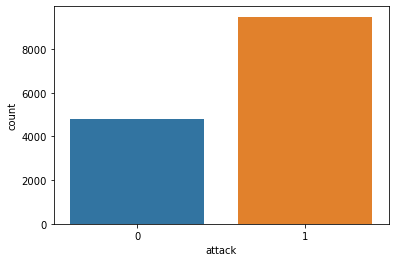

In [25]:
#Visualizando o desbalanceamento de forma gráfica
#Podemos verificar Claramente não temos uma base significamente desbalanceada.
import seaborn as sns
ax = sns.countplot(x='attack', data=df)

In [26]:
# Desativando os avisos das bibliotecas depreciadas:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [27]:
#Aqui Remover os valores ausentes
df.dropna ()

pkSeqID    sport    dport  pkts    bytes     seq       dur     mean  \
0      1000001  49731.0  41081.0     2      120  180408     41906    41906   
1      1000002  49731.0  13371.0     2      120  180409     41897    41897   
2      1000003  49731.0   3796.0     2      120  180410     41897    41897   
3      1000004  49731.0  63993.0     2      120  180411     41911    41911   
4      1000005  49731.0  27356.0     2      120  180412     41896    41896   
...        ...      ...      ...   ...      ...     ...       ...      ...   
14432  1859862     80.0     80.0  2482   734672       5  91971352  4804359   
14433  1859863     80.0     80.0  7355  6885400       4  91996353  4826048   
14434  1859864      0.0      0.0  4413  3136953       6  91984001  4816772   
14435  1859865    365.0    565.0  3953   237180       7  91971367  4815763   
14436  1859866  41307.0   8883.0    78    32474       8  91102005  2142407   

        stddev       sum  ...  rate_999079  rate_999122  rate_999196  \
0            0     41906  ...            0            0            0   
1            0     41897  ...            0            0            0   
2            0     41897  ...            0            0            0   
3            0     41911  ...            0            0            0   
4            0     41896  ...            0            0            0   
...        ...       ...  ...          ...          ...          ...   
14432   700877  91282822  ...            0            0            0   
14433   693337  91694908  ...            0            0            0   
14434   691904  91518669  ...            0            0            0   
14435   703533  91499504  ...            0            0            0   
14436  1644858   4070573  ...            0            0            0   

       rate_999247  rate_999295  rate_999357  rate_999403  rate_999456  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
14432            0            0            0            0            0   
14433            0            0            0            0            0   
14434            0            0            0            0            0   
14435            0            0            0            0            0   
14436            0            0            0            0            0   

       rate_99950027  rate_999507  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
...              ...          ...  
14432              0            0  
14433              0            0  
14434              0            0  
14435              0            0  
14436              0            0  

[14258 rows x 8068 columns]

In [28]:
#Veremos a seguir qual será o comportamento do modelo perante esses dados.
#Essa será uma regressão logística do tipo binominal, pois classificaremos as resposta dadas em dois grupos ou categorias.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss



In [29]:
#verificar se existe algun valoe NAN
np.isnan (df)

pkSeqID  sport  dport   pkts  bytes    seq    dur   mean  stddev  \
0        False  False  False  False  False  False  False  False   False   
1        False  False  False  False  False  False  False  False   False   
2        False  False  False  False  False  False  False  False   False   
3        False  False  False  False  False  False  False  False   False   
4        False  False  False  False  False  False  False  False   False   
...        ...    ...    ...    ...    ...    ...    ...    ...     ...   
14432    False  False  False  False  False  False  False  False   False   
14433    False  False  False  False  False  False  False  False   False   
14434    False  False  False  False  False  False  False  False   False   
14435    False  False  False  False  False  False  False  False   False   
14436    False  False  False  False  False  False  False  False   False   

         sum  ...  rate_999079  rate_999122  rate_999196  rate_999247  \
0      False  ...        False        False        False        False   
1      False  ...        False        False        False        False   
2      False  ...        False        False        False        False   
3      False  ...        False        False        False        False   
4      False  ...        False        False        False        False   
...      ...  ...          ...          ...          ...          ...   
14432  False  ...        False        False        False        False   
14433  False  ...        False        False        False        False   
14434  False  ...        False        False        False        False   
14435  False  ...        False        False        False        False   
14436  False  ...        False        False        False        False   

       rate_999295  rate_999357  rate_999403  rate_999456  rate_99950027  \
0            False        False        False        False          False   
1            False        False        False        False          False   
2            False        False        False        False          False   
3            False        False        False        False          False   
4            False        False        False        False          False   
...            ...          ...          ...          ...            ...   
14432        False        False        False        False          False   
14433        False        False        False        False          False   
14434        False        False        False        False          False   
14435        False        False        False        False          False   
14436        False        False        False        False          False   

       rate_999507  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
14432        False  
14433        False  
14434        False  
14435        False  
14436        False  

[14258 rows x 8068 columns]

In [30]:
np.where(df.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [31]:
#Separa dados e suas classes
X = df.drop('attack', axis = 1)
y = df['attack']
#As features estão na variável X e na variável y temos o nosso target (o que queremos prever).

In [32]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [33]:
#Contagem antes do classificador 
from collections import Counter
counter_test = Counter(y)
counter_test

Counter({1: 9481, 0: 4777})

# LR

In [34]:
#Contagem antes do classificador 
from collections import Counter
counter_test = Counter(y)
counter_test

Counter({1: 9481, 0: 4777})

In [35]:
#Importando os módulos e instanciando LR
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)

In [36]:
#Treinando o algoritmo
model.fit(X_train, y_train)

/root/home/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [37]:
#Coloca as classificações na variável y_pred
y_pred = model.predict(X_test)
#Esse método retorna as predições dos dados de teste.

In [38]:
#Checa a acurácia do modelo
#A acurácia é uma das maneiras de verificar a qualidade do modelo.
accuracy_score(y_test, y_pred)

0.841234221598878

In [39]:
#Relatório de Classificação
#Observe o Recall
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      1194
           1       0.95      0.80      0.87      2371

    accuracy                           0.84      3565
   macro avg       0.83      0.86      0.83      3565
weighted avg       0.87      0.84      0.85      3565



Note que o recall (número de acertos) para a classe 0 é muito alta, e alta também para a classe 1. Isso só reforça o que já sabemos, nosso modelo aprendeu sobre ambas as classe de exemplos.

A matriz de confusão nos mostra o número exato de registros classificados por classe. Temos xxx registos classificados como sendo da classe 0 quando na verdade eram da classe 1.

In [40]:
#Matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1099    95  1194
1         471  1900  2371
All      1570  1995  3565


In [41]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8608925761946241


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [43]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.841234221598878
Precisão:  0.9523809523809523
Revocação:  0.8013496415014761
Medida F1:  0.8703618873110397


In [34]:
#Guardando os dados
X1 = X
y1 = y

# LR + ADASYN

In [ ]:
#Recuperando os dados
X = X1
y = y1

In [35]:
#Instânciando ADASYN:
from imblearn.over_sampling import ADASYN
ada = ADASYN()

In [36]:
#Contagem antes do Adasyn 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [37]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [38]:
#Aplica o Adasyn
X_train_AD, y_train_AD = ada.fit_resample(X_train, y_train)

In [39]:
#Contagem depois do Adasyn dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_AD)
counter_train

Counter({1: 7110, 0: 7111})

In [40]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [42]:
#Treinando o algoritmo
model = LogisticRegression(max_iter=200)
model.fit(X_train_AD, y_train_AD)

/root/home/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [43]:
#Insere as classificações na variável y_pred
y_pred = model.predict(X_test)

In [44]:
#Checa a acurácia do modelo após Adasyn
accuracy_score(y_test, y_pred)

0.8126227208976157

In [45]:
#Relatório de Classificação
#Observe o Recall
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1194
           1       0.98      0.73      0.84      2371

    accuracy                           0.81      3565
   macro avg       0.82      0.85      0.81      3565
weighted avg       0.87      0.81      0.82      3565



In [46]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8535184357044607


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8126227208976157
Precisão:  0.9846328969834945
Revocação:  0.7296499367355547
Medida F1:  0.8381782945736433


# NearMiss

In [45]:
#Recuperando os dados
X = X1
y = y1

In [46]:
#Instânciando NearMiss:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

In [47]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [48]:
#Contagem antes do NearMiss 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [49]:
#Aplica o NearMiss
X_train_NM, y_train_NM = nr.fit_resample(X_train, y_train)

In [50]:
#Contagem depois do NearMiss dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_NM)
counter_train

Counter({0: 3583, 1: 3583})

In [51]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [52]:
#Treinando o algoritmo
model.fit(X_train_NM, y_train_NM)

LogisticRegression(max_iter=200)

In [53]:
#Insere as classificações na variável y_pred
y_pred = model.predict(X_test)

In [54]:
#Checa a acurácia do modelo após NearMiss
accuracy_score(y_test, y_pred)

0.8280504908835905

In [55]:
#Precisão, Recall, F1-Score
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1194
           1       0.99      0.75      0.85      2371

    accuracy                           0.83      3565
   macro avg       0.83      0.87      0.82      3565
weighted avg       0.88      0.83      0.83      3565



In [56]:
#Matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1177    17  1194
1         596  1775  2371
All      1773  1792  3565


In [57]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8671957072018323


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8280504908835905
Precisão:  0.9905133928571429
Revocação:  0.7486292703500632
Medida F1:  0.8527504203699254


# SMOTE (Synthetic Minority Over-sampling Technique)

In [60]:
#Recuperando os dados para aplicar o SMOTE
X = X1
y = y1

In [61]:
#contagem para verificar
from collections import Counter
counter_test = Counter(y)
counter_test

Counter({1: 9481, 0: 4777})

In [62]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [63]:
#Instância o SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [64]:
#Aplica o SMOTE nos dados
X_train_SMT, y_train_SMT = smt.fit_resample(X_train, y_train)

In [65]:
#Contagem depois do SMOTE dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_SMT)
counter_train

Counter({1: 7110, 0: 7110})

In [66]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [67]:
#Treinando o algoritmo com LR
model.fit(X_train_SMT, y_train_SMT)

/root/home/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [68]:
#Coloca as classificações na variável y_pred
y_pred = model.predict(X_test)

In [69]:
#Checa a acurácia do modelo após SMOTE
accuracy_score(y_test, y_pred)

0.853015427769986

In [70]:
#Precisão, Recall, F1-Score após SMOTE
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82      1194
           1       0.98      0.79      0.88      2371

    accuracy                           0.85      3565
   macro avg       0.84      0.88      0.85      3565
weighted avg       0.89      0.85      0.86      3565



In [71]:
#Matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1161    33  1194
1         491  1880  2371
All      1652  1913  3565


In [72]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8826380955812381


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [74]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.853015427769986
Precisão:  0.9827496079456352
Revocação:  0.7929143821172501
Medida F1:  0.8776844070961718


# SVMSMOTE

In [75]:
#recuperando para aplicar SVMSMOTE
X = X1
y = y1

In [76]:
#contagem para verificar
from collections import Counter
counter_test = Counter(y)
counter_test

Counter({1: 9481, 0: 4777})

In [77]:
# Instânciando SVMSMOTE
from imblearn.over_sampling import SVMSMOTE
svmsmt = SVMSMOTE()

In [78]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [79]:
#Aplica o SVMSMOTE
X_train_SVMSMT, y_train_SVMSMT = svmsmt.fit_resample(X_train, y_train)

In [80]:
#Contagem SVMSMOTE dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_SVMSMT)
counter_train

Counter({1: 7110, 0: 7110})

In [81]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [82]:
#Treinando o algoritmo
model.fit(X_train_SVMSMT, y_train_SVMSMT)

/root/home/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [83]:
#Insere as classificações na variável y_pred
y_pred = model.predict(X_test)

In [84]:
#Checa a acurácia do modelo após SVMSMOTE com SVM
accuracy_score(y_test, y_pred)

0.8277699859747546

In [85]:
#Precisão, Recall, F1-Score após SMOTE
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79      1194
           1       0.98      0.75      0.85      2371

    accuracy                           0.83      3565
   macro avg       0.83      0.86      0.82      3565
weighted avg       0.88      0.83      0.83      3565



In [86]:
#Matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1166    28  1194
1         586  1785  2371
All      1752  1813  3565


In [87]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8646981568887598


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [89]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8277699859747546
Precisão:  0.9845559845559846
Revocação:  0.7528469000421762
Medida F1:  0.8532504780114724


# SMOTEENN

In [90]:
#Recuperando para aplicar o SMOTEENN
X = X1
y = y1

In [91]:
#Verificando
from collections import Counter
counter_test = Counter(y)
counter_test

Counter({1: 9481, 0: 4777})

In [92]:
#Instânciando SMOTEENN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
#Define SMOTEENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [93]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [94]:
#Aplica o SMOTEENN
X_train_SMOTEENN, y_train_SMOTEENN = resample.fit_resample(X_train, y_train)

In [95]:
#Contagem depois de SMOTEENN dados Treinamento 
from collections import Counter
counter_train = Counter(y_train_SMOTEENN)
counter_train

Counter({0: 7069, 1: 7076})

In [96]:
#Treinando o algoritmo
model.fit(X_train_SMOTEENN, y_train_SMOTEENN)

/root/home/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [97]:
#Insere as classificações na variável y_pred
y_pred = model.predict(X_test)

In [98]:
#Checa a acurácia do modelo após SMOTEENN
accuracy_score(y_test, y_pred)

0.8572230014025245

In [99]:
#Precisão, Recall, F1-Score após SMOTE
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1194
           1       0.98      0.80      0.88      2371

    accuracy                           0.86      3565
   macro avg       0.85      0.89      0.85      3565
weighted avg       0.89      0.86      0.86      3565



In [100]:
#Matriz de confusão após SMOTEENN
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1164    30  1194
1         479  1892  2371
All      1643  1922  3565


In [101]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8864249548035411


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [103]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8572230014025245
Precisão:  0.9843912591050988
Revocação:  0.7979755377477857
Medida F1:  0.8814348940135104


# Borderline

In [104]:
#Recuperando para aplicar o borderline-SMOTE
X = X1
y = y1

In [105]:
#contagem antes borderline-SMOTE
from collections import Counter
counter_test = Counter(y)
counter_test

Counter({1: 9481, 0: 4777})

In [106]:
from imblearn.over_sampling import BorderlineSMOTE
bsmt = BorderlineSMOTE()

In [107]:
#Separa dados de treino e teste
#70% para treinamento e 30% para teste. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [108]:
#Aplica o borderlineSMOTE nos dados
X_train_BSMT, y_train_BSMT = bsmt.fit_resample(X_train, y_train)

In [109]:
#Separa dados de treino e teste
#70% para treinamento e 30% para teste. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [110]:
#Contagem depois do borderline-SMOTE dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_BSMT)
counter_train

Counter({1: 7110, 0: 7110})

In [111]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [112]:
#Treinando o algoritmo
model.fit(X_train_BSMT, y_train_BSMT)

/root/home/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [113]:
#Coloca as classificações na variável y_pred
y_pred = model.predict(X_test)

In [114]:
#Checa a acurácia do modelo após borderline-SMOTE
accuracy_score(y_test, y_pred)

0.8179523141654979

In [115]:
#Recall após borderlineSMOTE
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1194
           1       0.98      0.74      0.84      2371

    accuracy                           0.82      3565
   macro avg       0.82      0.86      0.81      3565
weighted avg       0.87      0.82      0.82      3565



In [116]:
#Matriz de confusão após borderlineSMOTE

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1166    28  1194
1         621  1750  2371
All      1787  1778  3565


In [117]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8573173049275621


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [119]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8179523141654979
Precisão:  0.984251968503937
Revocação:  0.7380851961197806
Medida F1:  0.8435767654856591


# Pipeline 1 LR+ADASYN+SMOTE+BORDERLINE

In [120]:
#Recuperando os dados
X = X1
y = y1

In [121]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
#Contagem antes do ASB 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 6646, 0: 3334})

In [123]:
# Criando o pipeline de oversampling
pipeline = make_pipeline(
    ADASYN(random_state=42),
    SMOTE(random_state=42),
    BorderlineSMOTE(random_state=42))

In [124]:
# Aplicando as técnicas de oversampling no conjunto de treinamento
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [125]:
#Treinando o algoritmo
model.fit(X_train_resampled, y_train_resampled)

/root/home/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [126]:
#Coloca as classificações na variável y_pred
y_pred = model.predict(X_test)

In [127]:
#Checa a acurácia do modelo após pipeline
accuracy_score(y_test, y_pred)

0.8186068256194483

In [128]:
#Recall após pipeline
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1443
           1       0.99      0.74      0.84      2835

    accuracy                           0.82      4278
   macro avg       0.82      0.86      0.81      4278
weighted avg       0.87      0.82      0.82      4278



In [129]:
#Matriz de confusão após pipeline

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1413    30  1443
1         746  2089  2835
All      2159  2119  4278


In [130]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8580353247019913


In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [132]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8186068256194483
Precisão:  0.9858423784804153
Revocação:  0.7368606701940035
Medida F1:  0.8433589018974565


## TESTES COM RANDOM FOREST

# Pipeline RF+ADASYN+SMOTE+BORDERLINE

In [146]:
#Recuperando os dados
X = X1
y = y1

In [147]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
#Contagem antes do ASB 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 6646, 0: 3334})

In [149]:
# Criando o pipeline de oversampling
pipeline = make_pipeline(
    ADASYN(random_state=42),
    SMOTE(random_state=42),
    BorderlineSMOTE(random_state=42))

In [150]:
# Aplicando as técnicas de oversampling no conjunto de treinamento
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [151]:
# Treinando e avaliando o modelo com o conjunto de treinamento após a aplicação das técnicas de resampling
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [152]:
y_pred = clf.predict(X_test)

In [153]:
print('Desempenho do modelo no conjunto de teste após aplicar as técnicas de oversampling combinadas:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar as técnicas de oversampling combinadas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1443
           1       1.00      1.00      1.00      2835

    accuracy                           1.00      4278
   macro avg       1.00      1.00      1.00      4278
weighted avg       1.00      1.00      1.00      4278



In [154]:
#Matriz de confusão após pipeline

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1442     1  1443
1           3  2832  2835
All      1445  2833  4278


In [155]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.999124399124399


In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [157]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.9990649836372136
Precisão:  0.9996470172961525
Revocação:  0.9989417989417989
Medida F1:  0.9992942836979534


# RF

In [170]:
#Recuperando os dados
X = X1
y = y1

In [171]:
#Contagem  
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 6646, 0: 3334})

In [172]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [173]:
clf = DecisionTreeClassifier(random_state=42)

In [174]:
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [175]:
#Coloca as classificações na variável y_pred
y_pred = model.predict(X_test)
#Esse método retorna as predições dos dados de teste.

In [176]:
print('Desempenho do modelo no conjunto de teste após aplicar RF:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar RF:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1194
           1       0.99      0.73      0.84      2371

    accuracy                           0.82      3565
   macro avg       0.82      0.86      0.81      3565
weighted avg       0.87      0.82      0.82      3565



In [177]:
#Matriz de confusão após pipeline

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1172    22  1194
1         631  1740  2371
All      1803  1762  3565


In [178]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8577210528955759


In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [180]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8168302945301543
Precisão:  0.9875141884222475
Revocação:  0.7338675664276677
Medida F1:  0.8420033873699493


# RF+NearMiss

In [193]:
#Recuperando os dados
X = X1
y = y1

In [194]:
#Contagem antes do NearMiss 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [195]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [196]:
#Instânciando NearMiss:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

In [197]:
#Aplica o NearMiss
X_train_NM, y_train_NM = nr.fit_resample(X_train, y_train)

In [198]:
#Contagem antes do NearMiss 
from collections import Counter
counter_train = Counter(y_train_NM)
counter_train

Counter({0: 3583, 1: 3583})

In [199]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [188]:
clf = DecisionTreeClassifier(random_state=42)

In [200]:
#Treinando o algoritmo
clf.fit(X_train_NM, y_train_NM)

DecisionTreeClassifier(random_state=42)

In [201]:
#Insere as classificações na variável y_pred
y_pred = clf.predict(X_test)

In [202]:
print('Desempenho do modelo no conjunto de teste após aplicar RF+NearMiss:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar RF+NearMiss:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1194
           1       1.00      0.75      0.86      2371

    accuracy                           0.84      3565
   macro avg       0.84      0.88      0.83      3565
weighted avg       0.89      0.84      0.84      3565



In [203]:
#Matriz de confusão após pipeline

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1194     0  1194
1         581  1790  2371
All      1775  1790  3565


In [204]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.8774778574441164


In [205]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [206]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  0.8370266479663394
Precisão:  1.0
Revocação:  0.7549557148882328
Medida F1:  0.8603701033405431


# RF + ADASYN

In [49]:
#Recuperando os dados
X = X1
y = y1

In [50]:
#Instânciando ADASYN:
from imblearn.over_sampling import ADASYN
ada = ADASYN()

In [51]:
#Contagem antes do NearMiss 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [52]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [54]:
#Aplica o Adasyn nos dados

X_train_ADA, y_train_ADA = ada.fit_resample(X_train, y_train)

In [55]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

In [58]:
#Treinando o algoritmo com RF
clf.fit(X_train_ADA, y_train_ADA)

DecisionTreeClassifier(random_state=42)

In [59]:
#Insere as classificações na variável y_pred
y_pred = clf.predict(X_test)

In [60]:
print('Desempenho do modelo no conjunto de teste após aplicar RF+ADASYN:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar RF+ADASYN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      3565
   macro avg       1.00      1.00      1.00      3565
weighted avg       1.00      1.00      1.00      3565



In [61]:
#Matriz de confusão após pipeline

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1194     0  1194
1           0  2371  2371
All      1194  2371  3565


In [62]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

1.0


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  1.0
Precisão:  1.0
Revocação:  1.0
Medida F1:  1.0


# RF+SMOTE

In [282]:
#Recuperando os dados
X = X1
y = y1

In [283]:
#Contagem antes do SMOTE 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [284]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [285]:
#Instância o SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [286]:
#Aplica o SMOTE nos dados
X_train_SMT, y_train_SMT = smt.fit_resample(X_train, y_train)

In [287]:
#Contagem depois do SMOTE dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_SMT)
counter_train

Counter({1: 7110, 0: 7110})

In [288]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [289]:
clf = DecisionTreeClassifier(random_state=42)

In [290]:
#Treinando o algoritmo com LR
clf.fit(X_train_SMT, y_train_SMT)

DecisionTreeClassifier(random_state=42)

In [291]:
#Insere as classificações na variável y_pred
y_pred = clf.predict(X_test)

In [292]:
print('Desempenho do modelo no conjunto de teste após aplicar RF+smote:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar RF+smote:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      3565
   macro avg       1.00      1.00      1.00      3565
weighted avg       1.00      1.00      1.00      3565



In [293]:
#Matriz de confusão 

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1194     0  1194
1           0  2371  2371
All      1194  2371  3565


In [294]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

1.0


In [295]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [296]:
print("Desempenho no conjunto de teste com Pipeline:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com Pipeline:
Acurácia:  1.0
Precisão:  1.0
Revocação:  1.0
Medida F1:  1.0


# RF+SVMSMOTE

In [297]:
#Recuperando os dados
X = X1
y = y1

In [298]:
#Contagem antes do SVMSMOTE 
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [299]:
# Instânciando SVMSMOTE
from imblearn.over_sampling import SVMSMOTE
svmsmt = SVMSMOTE()

In [300]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [301]:
#Aplica o SVMSMOTE
X_train_SVMSMT, y_train_SVMSMT = svmsmt.fit_resample(X_train, y_train)

In [302]:
#Contagem depois do SVMSMOTE dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_SVMSMT)
counter_train

Counter({1: 7110, 0: 7110})

In [303]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [304]:
clf = DecisionTreeClassifier(random_state=42)

In [305]:
#Treinando o algoritmo com RF
clf.fit(X_train_SVMSMT, y_train_SVMSMT)

DecisionTreeClassifier(random_state=42)

In [306]:
#Insere as classificações na variável y_pred
y_pred = clf.predict(X_test)

In [307]:
print('Desempenho do modelo no conjunto de teste após aplicar RF+svmsmote:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar RF+svmsmote:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      3565
   macro avg       1.00      1.00      1.00      3565
weighted avg       1.00      1.00      1.00      3565



In [308]:
#Matriz de confusão 

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1194     0  1194
1           0  2371  2371
All      1194  2371  3565


In [309]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

1.0


In [310]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [311]:
print("Desempenho no conjunto de teste com RF+SVMSMOTE:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com RF+SVMSMOTE:
Acurácia:  1.0
Precisão:  1.0
Revocação:  1.0
Medida F1:  1.0


# RF+SMOTEENN

In [250]:
#Recuperando os dados
X = X1
y = y1

In [251]:
#Contagem antes do SMOTEENN
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [252]:
#Instânciando SMOTEENN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
#Define SMOTEENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [253]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [254]:
#Aplica o SMOTEENN
X_train_SMOTEENN, y_train_SMOTEENN = resample.fit_resample(X_train, y_train)

In [255]:
#Contagem depois do SMOTE dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_SMOTEENN)
counter_train

Counter({0: 7065, 1: 7081})

In [256]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [257]:
clf = DecisionTreeClassifier(random_state=42)

In [258]:
#Treinando o algoritmo com RF
clf.fit(X_train_SMOTEENN, y_train_SMOTEENN)

DecisionTreeClassifier(random_state=42)

In [260]:
#Insere as classificações na variável y_pred
y_pred = clf.predict(X_test)

In [261]:
print('Desempenho do modelo no conjunto de teste após aplicar RF+SMOTEENN:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar RF+SMOTEENN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      3565
   macro avg       1.00      1.00      1.00      3565
weighted avg       1.00      1.00      1.00      3565



In [262]:
#Matriz de confusão 

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1193     1  1194
1           2  2369  2371
All      1195  2370  3565


In [263]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

0.9991594765617768


In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [265]:
print("Desempenho no conjunto de teste com RF+SVMSMOTE:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com RF+SVMSMOTE:
Acurácia:  0.9991584852734923
Precisão:  0.9995780590717299
Revocação:  0.9991564740615774
Medida F1:  0.999367222105041


# RF+BorderlineSMOTE

In [266]:
#Recuperando os dados
X = X1
y = y1

In [267]:
#Contagem antes do BorderlineSMOTE
from collections import Counter
counter_train = Counter(y_train)
counter_train

Counter({1: 7110, 0: 3583})

In [268]:
from imblearn.over_sampling import BorderlineSMOTE
bsmt = BorderlineSMOTE()

In [269]:
#Separa dados de treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [270]:
#Aplica o borderlineSMOTE nos dados
X_train_BSMT, y_train_BSMT = bsmt.fit_resample(X_train, y_train)

In [271]:
#Contagem depois do borderline-SMOTE dados Treinamento (dados balanceados)
from collections import Counter
counter_train = Counter(y_train_BSMT)
counter_train

Counter({1: 7110, 0: 7110})

In [272]:
#Contagem dados testes
from collections import Counter
counter_test = Counter(y_test)
counter_test

Counter({1: 2371, 0: 1194})

In [273]:
clf = DecisionTreeClassifier(random_state=42)

In [274]:
#Treinando o algoritmo
clf.fit(X_train_BSMT, y_train_BSMT)

DecisionTreeClassifier(random_state=42)

In [276]:
#Insere as classificações na variável y_pred
y_pred = clf.predict(X_test)

In [277]:
print('Desempenho do modelo no conjunto de teste após aplicar RF+BorderlineSMOTE:')
print(classification_report(y_test, y_pred))

Desempenho do modelo no conjunto de teste após aplicar RF+BorderlineSMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      2371

    accuracy                           1.00      3565
   macro avg       1.00      1.00      1.00      3565
weighted avg       1.00      1.00      1.00      3565



In [278]:
#Matriz de confusão 

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1194     0  1194
1           0  2371  2371
All      1194  2371  3565


In [279]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)

print(roc)

1.0


In [280]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [281]:
print("Desempenho no conjunto de teste com RF+SVMSMOTE:")
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred))
print("Revocação: ", recall_score(y_test, y_pred))
print("Medida F1: ", f1_score(y_test, y_pred))

Desempenho no conjunto de teste com RF+SVMSMOTE:
Acurácia:  1.0
Precisão:  1.0
Revocação:  1.0
Medida F1:  1.0


# FIM